<a href="https://colab.research.google.com/github/manasvini351/DiabetesPredictionProject/blob/main/ML_MINOR_MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIABETES PREDICTION USING LOGISTIC REGRESSION**


**INTRODUCTION**:

Diabetes is a disease associated with high levels of glucose in the blood. 
Diabetes make many kinds of complications, which also leads to a high rate 
of repeated admission of patients.Diabetes has no cure, you can take steps to manage your diabetes and stay healthy.The aim of this study is to predict whether a patient have Diabetes or not,based on certain diagnostic measurements included in the dataset.


**STEP 1**: Take the data and import the Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetes_df= pd.read_csv('/content/diabetes.csv')

In [3]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**STEP 2:** Filter the Data 


*   As can be easily seen in the dataframe, there are 9 columns. Namely, Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age and Outcome. Here, 
1.The pregnancies column signifies how many times
they were pregnant.

2.Glucose being their Plasma Glucose Concentration on an(GTT). 

3.Blood Pressure being their diastolic Blood Pressure (mmHg) 

4.SkinThickness: Triceps skin fold thickness (mm).

5.Insulin: 2-Hour serum insulin (mu U/ml).

6.BMI: Body mass index (weight in kg/(height in m)^2).

7.The Diabetes Pedigree Function is a function which provides us with the likelihood of diabetes based on family history.

8.Age: Age (years).

9.The outcome column one target variable or class variable, which says if they had diabetes (1) or did not (0).
*   Now, In our analysis, We want to see what is the relation between some high risk factors like the age, pregnancies and so on.We don't really need Skin Thickness. Also, the Pedigree Function is one another value which can complicate things in the long run, hence we delete those columns.



In [4]:
diabetes_df.drop(columns=['DiabetesPedigreeFunction'], inplace=True)

In [5]:
diabetes_df.drop(columns=['SkinThickness'], inplace=True)

In [6]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,6,148,72,0,33.6,50,1
1,1,85,66,0,26.6,31,0
2,8,183,64,0,23.3,32,1
3,1,89,66,94,28.1,21,0
4,0,137,40,168,43.1,33,1
...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,63,0
764,2,122,70,0,36.8,27,0
765,5,121,72,112,26.2,30,0
766,1,126,60,0,30.1,47,1




*   We need to analyse and clean data, to understand the data we need to see some parameters,make sure that they are all okay. For ex: glucose, bloodpressure etc can't be 0-20, well because it's not possible.
*   We do see there are some data that are given a 0 value, this is probably because of typing error. Hence we delete those rows entirely as the other values are insignificant.Also,there maybe some irregular values, hence we'll take a look at the top 10 values of each column, and if found irregular we can easily drop or edit according to the neighbouring cells.



In [7]:
diabetes_df.loc[diabetes_df['Glucose'] <20]
diabetes_df.drop(diabetes_df.loc[diabetes_df['Glucose']==0].index, inplace=True)
diabetes_df.loc[diabetes_df['BloodPressure'] <20]
diabetes_df.drop(diabetes_df.loc[diabetes_df['BloodPressure'] <20].index, inplace=True)
diabetes_df.loc[diabetes_df['BMI'] <15]
diabetes_df.drop(diabetes_df.loc[diabetes_df['BMI']==0].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[diabetes_df['Insulin']==0].index, inplace=True)
diabetes_df.drop(diabetes_df.loc[diabetes_df['Age']==0].index, inplace=True)

In [8]:
from IPython.display import display
with pd.option_context('display.max_rows', 10):
    display(diabetes_df[diabetes_df.Glucose > 500])

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome


In [9]:
from IPython.display import display
with pd.option_context('display.max_rows', 10):
    display(diabetes_df[diabetes_df.BloodPressure > 360])

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome


In [10]:
from IPython.display import display
with pd.option_context('display.max_rows', 10):
    display(diabetes_df[diabetes_df.BMI > 70])

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome


In [11]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
3,1,89,66,94,28.1,21,0
4,0,137,40,168,43.1,33,1
6,3,78,50,88,31.0,26,1
8,2,197,70,543,30.5,53,1
13,1,189,60,846,30.1,59,1
...,...,...,...,...,...,...,...
753,0,181,88,510,43.3,26,1
755,1,128,88,110,36.5,37,1
760,2,88,58,16,28.4,22,0
763,10,101,76,180,32.9,63,0


**EXPLORATORY DATA ANALYSIS:**

CORRELATION MATRIX: Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to get better understanding of the relationships between variables. The statistical relationship between two variables is referred as their correlation.

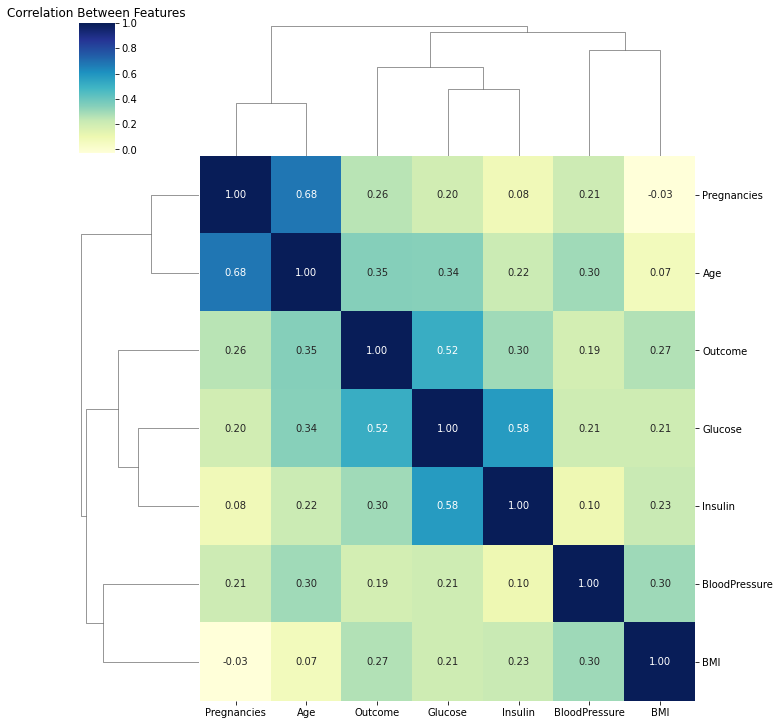

In [12]:
corr_data = diabetes_df.corr() 
sns.clustermap(corr_data,annot= True,cmap = "YlGnBu",fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

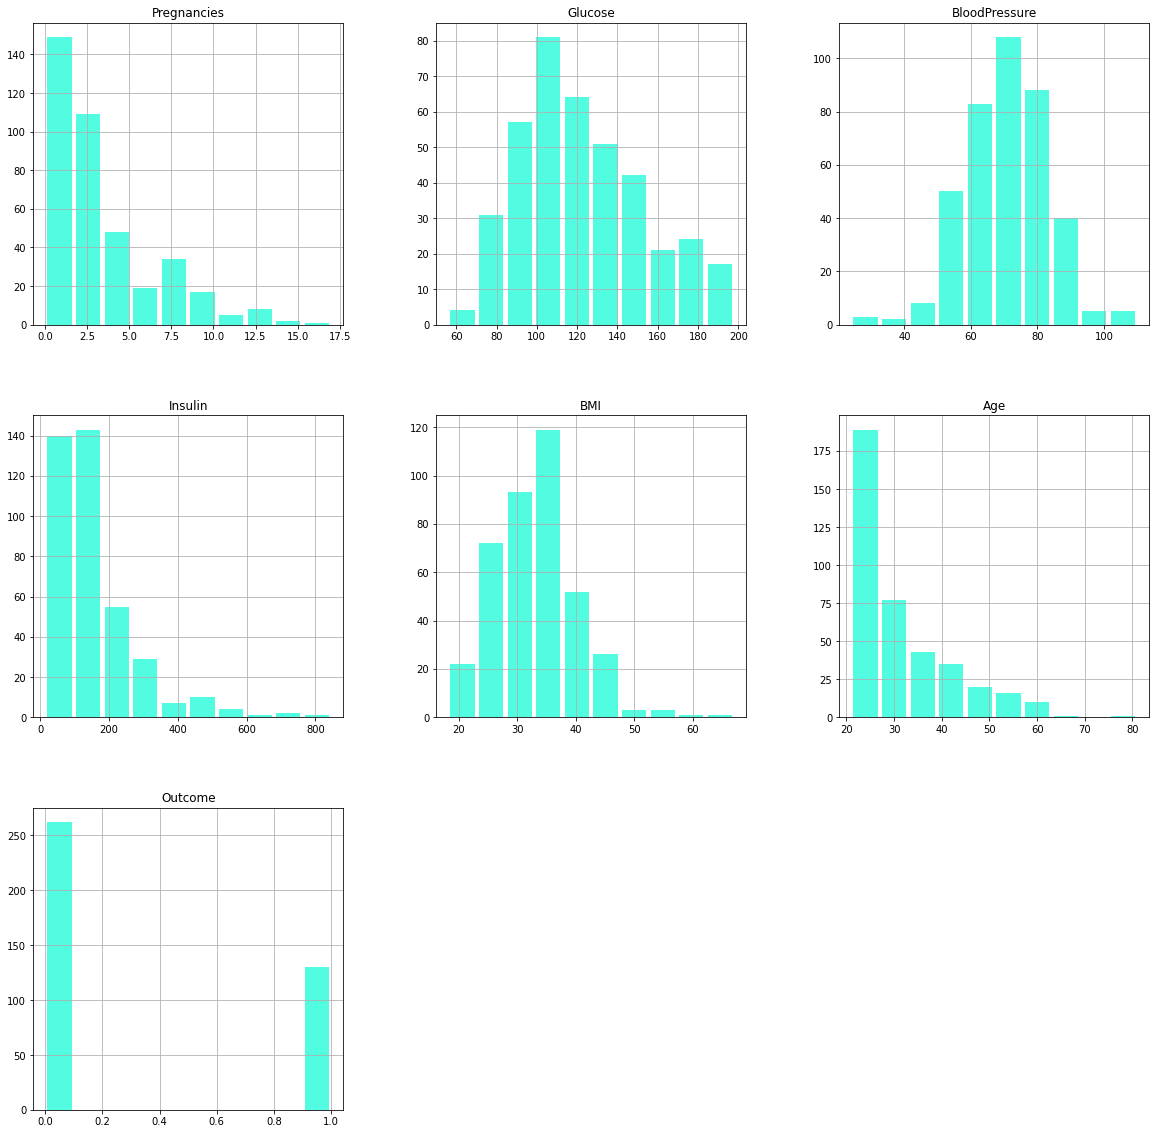

In [15]:
fig=diabetes_df.hist(figsize = (20,20), color='#09FBD3',alpha=0.7, rwidth=0.85)

**STEP 3:** Divide the input and output.

In [13]:
#input parameters
X = diabetes_df[['Pregnancies','Glucose', 'BloodPressure','Insulin', 'BMI',  'Age']].values

In [14]:
X

array([[  1. ,  89. ,  66. ,  94. ,  28.1,  21. ],
       [  0. , 137. ,  40. , 168. ,  43.1,  33. ],
       [  3. ,  78. ,  50. ,  88. ,  31. ,  26. ],
       ...,
       [  2. ,  88. ,  58. ,  16. ,  28.4,  22. ],
       [ 10. , 101. ,  76. , 180. ,  32.9,  63. ],
       [  5. , 121. ,  72. , 112. ,  26.2,  30. ]])

In [16]:
#Target Parameter- Output parameter
Y= diabetes_df['Outcome'].values

In [17]:
Y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

**STEP 4:** Train and Test Variables

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [20]:
X_test

array([[  2. , 146. ,  70. , 360. ,  28. ,  29. ],
       [  8. , 186. ,  90. , 225. ,  34.5,  37. ],
       [  2. , 108. ,  52. ,  63. ,  32.5,  22. ],
       [  5. , 117. ,  86. , 105. ,  39.1,  42. ],
       [  3. , 103. ,  72. , 152. ,  27.6,  27. ],
       [  6. , 154. ,  74. , 193. ,  29.3,  39. ],
       [  1. , 109. ,  38. , 120. ,  23.1,  26. ],
       [  1. , 100. ,  74. ,  46. ,  19.5,  28. ],
       [ 11. , 155. ,  76. , 150. ,  33.3,  51. ],
       [  7. , 142. ,  60. , 190. ,  28.8,  61. ],
       [  4. ,  99. ,  76. ,  51. ,  23.2,  21. ],
       [  0. , 138. ,  60. , 167. ,  34.6,  21. ],
       [  2. , 100. ,  54. , 105. ,  37.8,  24. ],
       [  9. , 112. ,  82. , 175. ,  34.2,  36. ],
       [  7. , 124. ,  70. , 215. ,  25.5,  37. ],
       [  2. ,  56. ,  56. ,  45. ,  24.2,  22. ],
       [  0. , 127. ,  80. , 210. ,  36.3,  23. ],
       [  2. ,  99. ,  52. ,  94. ,  24.6,  21. ],
       [  1. ,  79. ,  80. ,  37. ,  25.4,  22. ],
       [  2. , 112. ,  78. , 14

**STEP 5:** Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
X_test

array([[-0.37150091,  1.06924164,  0.05365129,  2.36262621, -0.69474541,
        -0.11807454],
       [ 1.27421338,  2.50458725,  1.5151865 ,  0.89347523,  0.29430856,
         0.69304624],
       [-0.37150091, -0.2943367 , -1.26173039, -0.86950596, -0.01001574,
        -0.82780523],
       [ 0.45135624,  0.02861607,  1.22287946, -0.41243676,  0.99425445,
         1.19999673],
       [-0.09721519, -0.4737549 ,  0.19980481,  0.09904543, -0.75561027,
        -0.32085474],
       [ 0.72564195,  1.35631076,  0.34595833,  0.54523203, -0.49693461,
         0.89582644],
       [-0.64578662, -0.25845306, -2.28480504, -0.24919776, -1.44033994,
        -0.42224484],
       [-0.64578662, -0.58140582,  0.34595833, -1.05451015, -1.98812368,
        -0.21946464],
       [ 2.09707053,  1.3921944 ,  0.49211185,  0.07728023,  0.11171398,
         2.11250762],
       [ 0.99992767,  0.92570708, -0.67711631,  0.51258423, -0.57301569,
         3.1264086 ],
       [ 0.17707052, -0.61728946,  0.49211185, -1.

**STEP 6:** Run the Logistic Regressor

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
classifier = LogisticRegression()

**STEP 7:** Fit the Model

In [27]:
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred_y = classifier.predict(X_test)

In [29]:
pred_y

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [30]:
Y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

**STEP 8:** Predicting the Output

In [31]:
classifier.predict(sc.transform([[6,148,72,0,33.6,50]]))

array([1])

In [33]:
classifier.predict(sc.transform([[2,88,58,16,28.4,22]]))

array([0])

**STEP 9:** Classification Metrics

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(Y_test, pred_y)*100

77.21518987341773

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(Y_test, pred_y)

array([[47,  7],
       [11, 14]])

**STEP 10:** Prediction Analysis

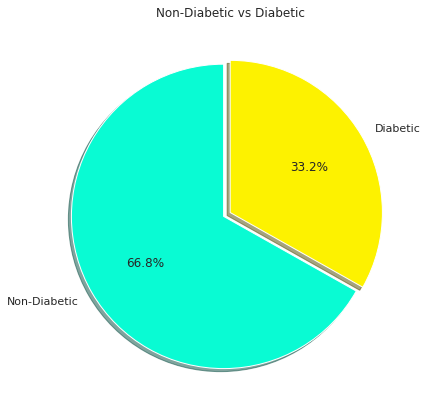

In [38]:
sns.set(style="whitegrid")
labels = ['Non-Diabetic', 'Diabetic']
sizes = diabetes_df['Outcome'].value_counts(sort = True)

colors = ["#09FBD3","#FDF200"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Non-Diabetic vs Diabetic')
plt.show()